# Scraping for Wins

### MSP 4.19.2018



In [ ]:
from IPython.display import HTML
HTML('''<script>code_show=true; function code_toggle() { if (code_show){ $('div.input').hide();} else { $('div.input').show(); } code_show = !code_show} $( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
# boilerplate imports

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

import matplotlib as mpl



In [2]:
# imports for scraping

from bs4 import BeautifulSoup
import requests




In [3]:
# 1: Name
# 2: Team
# 3: W
# 4: L
# 5: ERA
# 6: G
# 7: GS
# 8: CG
# 9: ShO
#10: SV
#11: HLD
#12: BS
#13: IP
#14: TBF
#15: H
#16: R
#17: ER
#18: HR
#19: BB
#20: IBB
#21: HBP
#22: WP
#23: BK
#24: SO

In [4]:
#0: W
#1: IP
#2: GS
#3: TBF
#4: SO
#5: BB
#6: HR
#7: L

def scrape_saves(year='2018'):

    get_url = 'https://www.fangraphs.com/leaders.aspx?pos=all&stats=pit&lg=all&qual=0&type=0&season='+year+'&month=0&season1='+year+'&ind=0&team=0&rost=0&age=0&filter=&players=0&page=1_1000'
    r  = requests.get(get_url)

    data = r.text

    soup = BeautifulSoup(data)

    tables = soup.findAll('table')

    PDict = {}


    for row in tables[11].find_all("tr")[3:]: 
                #print(tnum)
                try:
                    #sav = [td.find('a') for td in row.find_all("td")][0]
                    sav = [td.get_text() for td in row.find_all("td")]
                    #print(sav)
                    PDict[sav[1]] = [float(sav[3]),float(sav[13]),float(sav[7]),float(sav[14]),float(sav[24]),float(sav[19]),float(sav[18]),float(sav[4])]
                except:
                    print('FAILED')

    return PDict



[0.0, 220.0, 0.5, 35.0]

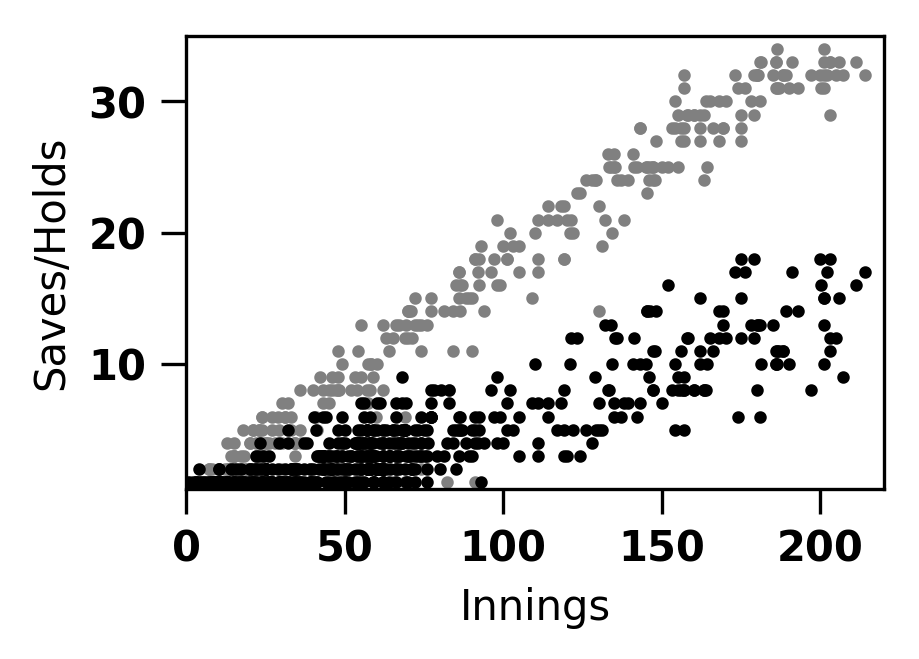

In [5]:
PDict = scrape_saves(year='2017')

plt.figure(figsize=(3,2))
plt.scatter(np.array(PDict.values())[:,1],np.array(PDict.values())[:,2],color='gray',s=4.)
plt.scatter(np.array(PDict.values())[:,1],np.array(PDict.values())[:,0],color='black',s=4.)

plt.xlabel('Innings')
plt.ylabel('Saves/Holds')
plt.axis([0.,220.,0.5,35.])

In [ ]:
PDict = scrape_saves(year='2017')

plt.figure(figsize=(3,2))
plt.scatter(np.array(PDict.values())[:,0],np.array(PDict.values())[:,2],color='gray',s=4.)
#plt.scatter(np.array(PDict.values())[:,1],np.array(PDict.values())[:,0],color='black',s=4.)

plt.xlabel('Wins')
plt.ylabel('Games Started')
plt.axis([-1.,21.,-1.,36.])

In [ ]:
PDict = scrape_saves(year='2017')

plt.figure(figsize=(3,2))
plt.scatter(np.array(PDict.values())[:,0],np.array(PDict.values())[:,7],color='gray',s=4.)
#plt.scatter(np.array(PDict.values())[:,1],np.array(PDict.values())[:,0],color='black',s=4.)

plt.xlabel('Wins')
plt.ylabel('Losses')
plt.axis([-1.,21.,-1.,21.])

In [6]:
import tensorflow as tf

In [ ]:
#https://www.kaggle.com/autuanliuyc/logistic-regression-with-tensorflow

In [ ]:
# https://medium.com/@saxenarohan97/intro-to-tensorflow-solving-a-simple-regression-problem-e87b42fd4845

In [ ]:
seed = 5
np.random.seed(seed)
tf.set_random_seed(seed)



In [275]:
#0: W
#1: IP
#2: GS
#3: TBF
#4: SO
#5: BB
#6: HR
#7: L




X = np.array(PDict.values())[:,[3,4,5,6]]
Y = np.array(PDict.values())[:,0]

print(X.shape)

# set replace=False, Avoid double sampling
train_index = np.random.choice(len(X), int(round(len(X) * 0.8)), replace=False)
# diff set
test_index = np.array(list(set(range(len(X))) - set(train_index)))

train_X = X[train_index]
train_Y = Y[train_index]
test_X = X[test_index]
test_Y = Y[test_index]



print("Shape of X_train: ", train_X.shape)
print("Shape of y_train: ", train_Y.shape)
print("Shape of X_test: ", test_X.shape)
print("Shape of y_test", test_Y.shape)

(754, 4)
('Shape of X_train: ', (603, 4))
('Shape of y_train: ', (603,))
('Shape of X_test: ', (151, 4))
('Shape of y_test', (151,))


In [282]:
# Define the normalized function
def min_max_normalized(data):
    col_max = np.max(data, axis=0)
    col_min = np.min(data, axis=0)
    return np.divide(data - col_min, col_max - col_min)

# Normalized processing, must be placed after the data set segmentation, 
# otherwise the test set will be affected by the training set
train_X = min_max_normalized(train_X)
test_X = min_max_normalized(test_X)




In [283]:
w = tf.Variable(tf.truncated_normal([X.shape[1], 1], mean=1.0, stddev=1.0, dtype=tf.float64))

w = tf.Variable(tf.zeros([X.shape[1], 1], dtype=tf.float64))


b = tf.Variable(tf.zeros(1, dtype = tf.float64))

In [284]:
def calc(x, y):
    # Returns predictions and error
    predictions = tf.add(b, tf.matmul(x, w))
    error = tf.reduce_mean(tf.square(y - predictions))
    return [ predictions, error ]

In [293]:
y, cost = calc(train_X, train_Y)

# Feel free to tweak these 2 values:
learning_rate = 0.005
epochs = 10000
points = [[], []] # You'll see later why I need this

In [294]:
init = tf.global_variables_initializer()
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

25.737204417311546
15.773523973722044
15.716843269274982
15.701974039796308
15.698070111084297
15.6970446042291
15.696774722898246
15.696703233457836
15.69668386029746
15.696678203828517
15.696676181915816
15.696675145874966
15.69667439843005
15.696673754680079
15.69667316434584
15.696672612601596
15.696672094037131
15.696671605809744
15.696671145845979
15.696670712362245


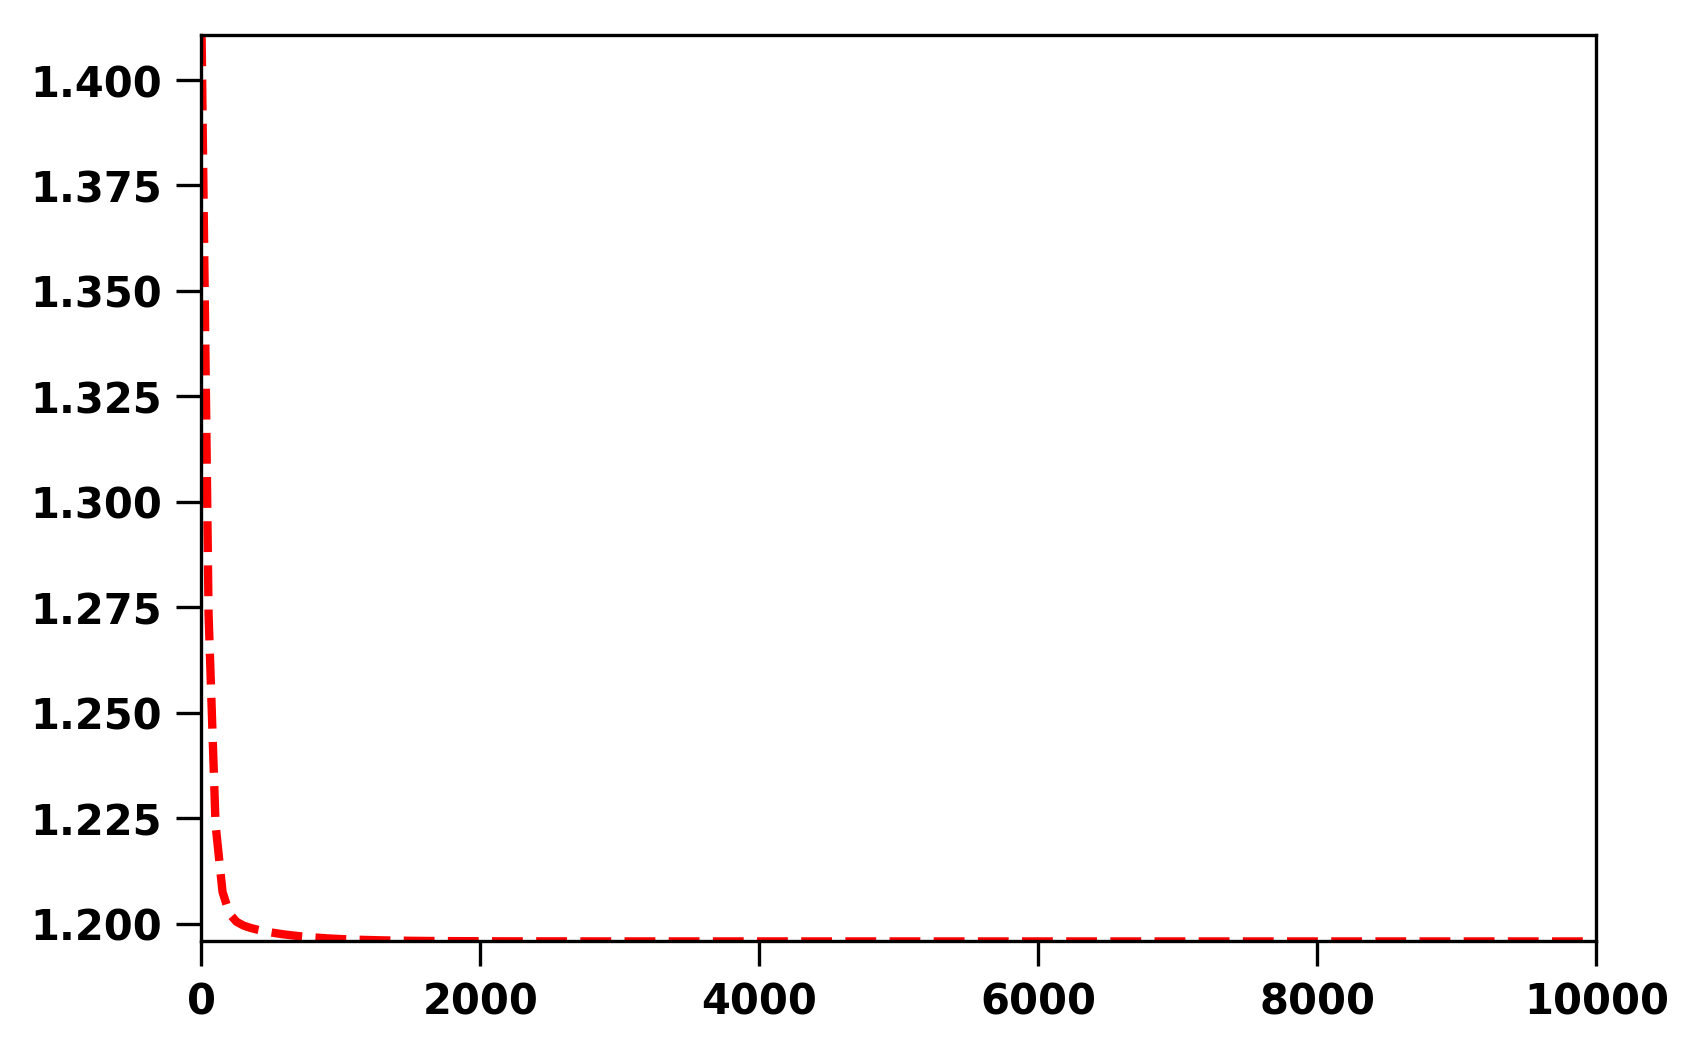

(array([[-0.00938029],
       [-0.01375519],
       [ 0.03206554],
       [-0.00679291]]), array([3.20657574]))


In [295]:
plt.figure(0)

with tf.Session() as sess:

    sess.run(init)
    
    wvals = np.zeros([epochs,X.shape[1]])
    bvals = np.zeros(epochs)
    e = 0

    for i in list(range(epochs)):

        sess.run(optimizer)
        wout,  bvals[i]  =  sess.run ([ w ,  b ])
        wvals[i] = wout.T[0]

        if i % 50 == 0.:
            points[0].append(i+1)
            points[1].append(sess.run(cost))

        if i % 500 == 0:
            print(sess.run(cost))

    plt.plot(np.array(points[0]), np.log10(points[1]), 'r--')
    plt.axis([0, epochs, np.min(np.log10(points[1])),np.max(np.log10(points[1]))])
    plt.show()

    #valid_cost = calc(valid_features, valid_prices)[1]

    #print('Validation error =', sess.run(valid_cost), '\n')

    test_cost = calc(test_X, test_Y)[1]

    # print('Test error =', sess.run(test_cost), '\n')
    w_value ,  b_value  =  sess.run ([ w ,  b ])
    
print(w_value,b_value)

(array([8064.,  494.,  298.,  218.,  172.,  146.,  128.,  121.,  124.,
         235.]),
 array([-0.01059408,  0.03363986,  0.07787381,  0.12210775,  0.16634169,
         0.21057563,  0.25480958,  0.29904352,  0.34327746,  0.38751141,
         0.43174535]),
 <a list of 10 Patch objects>)

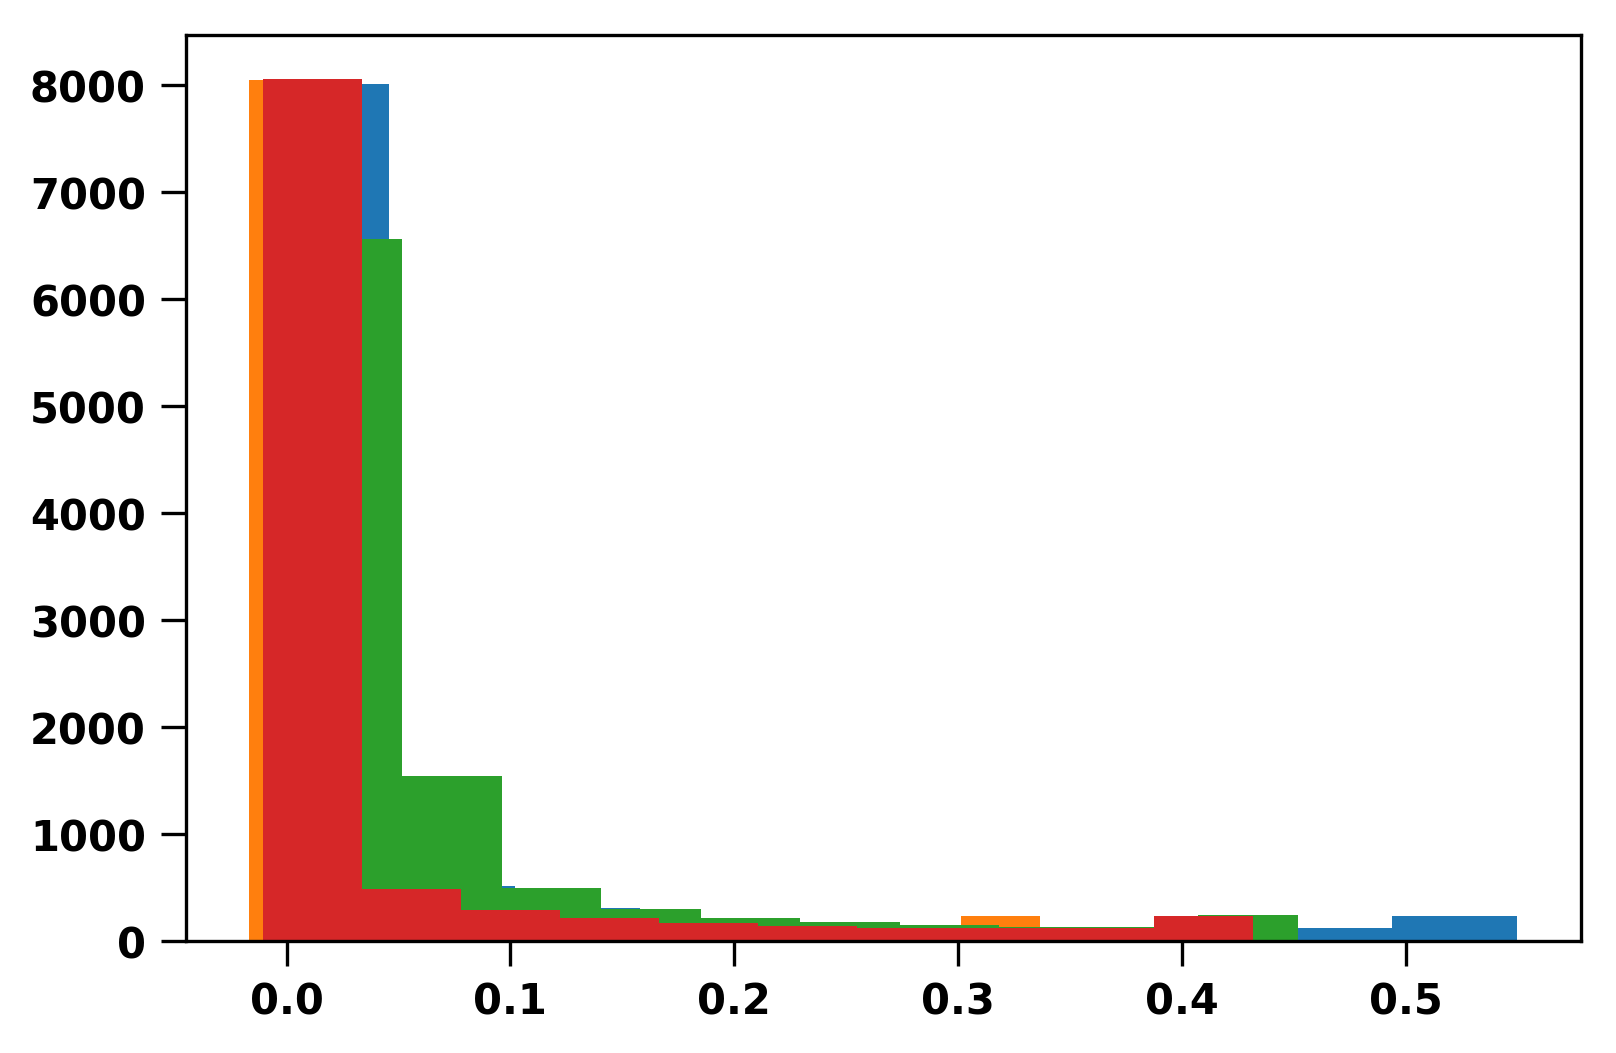

In [296]:

plt.hist(wvals[:,0])
plt.hist(wvals[:,1])
plt.hist(wvals[:,2])
plt.hist(wvals[:,3])

In [297]:
# Begin building the model framework
# Declare the variables that need to be learned and initialization
# There are 4 features here, A's dimension is (4, 1)
A = tf.Variable(tf.random_normal(shape=[4, 1]))
b = tf.Variable(tf.random_normal(shape=[1,]))
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [298]:
# Define placeholders
data = tf.placeholder(dtype=tf.float32, shape=[None, 4])
target = tf.placeholder(dtype=tf.float32, shape=[None, 1])

In [299]:
# Declare the model you need to learn
mod = tf.matmul(data, A) + b

In [300]:
# Declare loss function
# Use the sigmoid cross-entropy loss function,
# first doing a sigmoid on the model result and then using the cross-entropy loss function
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=mod, labels=target))

In [325]:
# Define the learning rate， batch_size etc.
learning_rate = 0.00001
batch_size = 500
iter_num = 2000

In [326]:
# Define the optimizer
opt = tf.train.GradientDescentOptimizer(learning_rate)

In [327]:
# Define the goal
goal = opt.minimize(loss)

In [328]:
# Define the accuracy
# The default threshold is 0.5, rounded off directly
prediction = tf.round(tf.sigmoid(mod))
# Bool into float32 type
correct = tf.cast(tf.equal(prediction, target), dtype=tf.float32)
# Average
accuracy = tf.reduce_mean(correct)
# End of the definition of the model framework

In [329]:
# Start training model
# Define the variable that stores the result
loss_trace = []
train_acc = []
test_acc = []

In [330]:
# training model
for epoch in range(iter_num):
    
    # Generate random batch index
    batch_index = np.random.choice(len(train_X), size=batch_size)
    batch_train_X = train_X[batch_index]
    batch_train_Y = np.matrix(train_Y[batch_index]).T
    
    sess.run(goal, feed_dict={data: batch_train_X, target: batch_train_Y})
    
    temp_loss = sess.run(loss, feed_dict={data: batch_train_X, target: batch_train_Y})
    
    # convert into a matrix, and the shape of the placeholder to correspond
    temp_train_acc = sess.run(accuracy, feed_dict={data: train_X, target: np.matrix(train_Y).T})
    temp_test_acc = sess.run(accuracy, feed_dict={data: test_X, target: np.matrix(test_Y).T})
    
    # recode the result
    loss_trace.append(temp_loss)
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
    # output
    if (epoch + 1) % 300 == 0:
        print('epoch: {:4d} loss: {:5f} train_acc: {:5f} test_acc: {:5f}'.format(epoch + 1, temp_loss,
                                                                          temp_train_acc, temp_test_acc))

epoch:  300 loss: -19.305449 train_acc: 0.137645 test_acc: 0.205298
epoch:  600 loss: -19.033463 train_acc: 0.137645 test_acc: 0.205298
epoch:  900 loss: -19.703259 train_acc: 0.137645 test_acc: 0.205298
epoch: 1200 loss: -20.644190 train_acc: 0.137645 test_acc: 0.205298
epoch: 1500 loss: -21.046963 train_acc: 0.137645 test_acc: 0.205298
epoch: 1800 loss: -19.191833 train_acc: 0.137645 test_acc: 0.205298


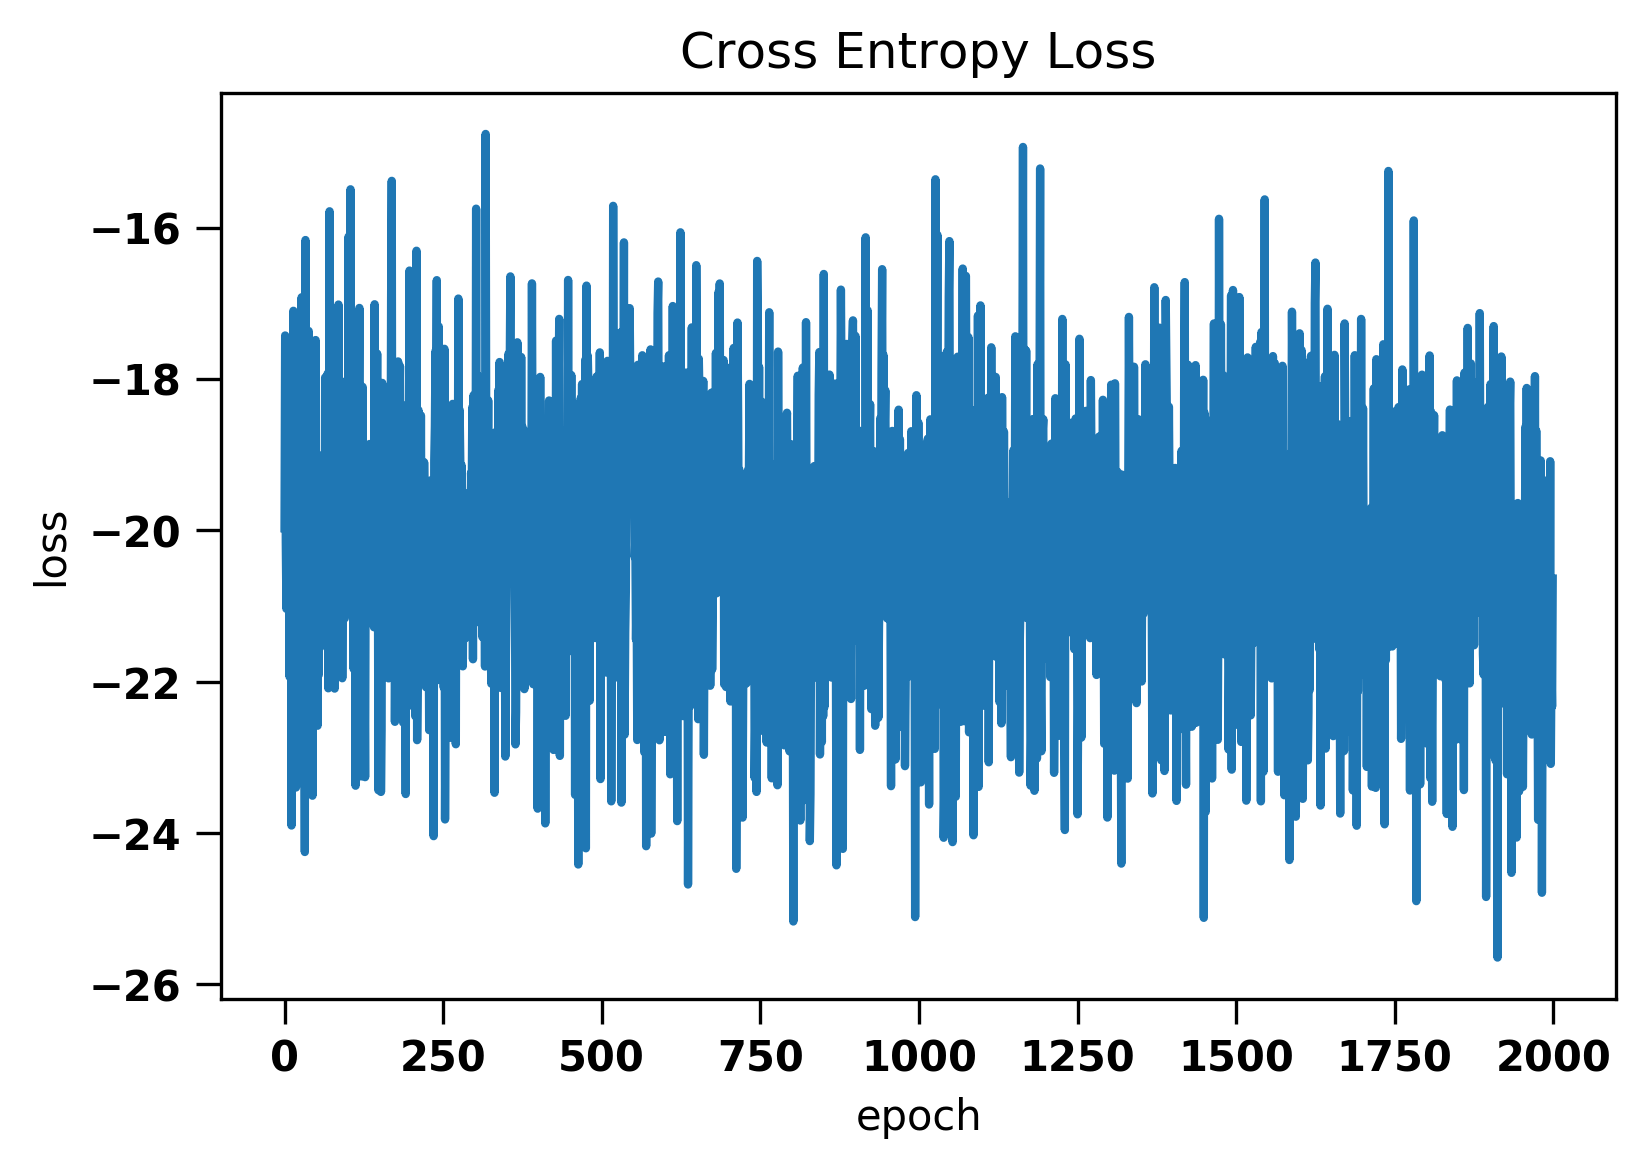

In [331]:
# Visualization of the results
# loss function
plt.plot(loss_trace)
plt.title('Cross Entropy Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

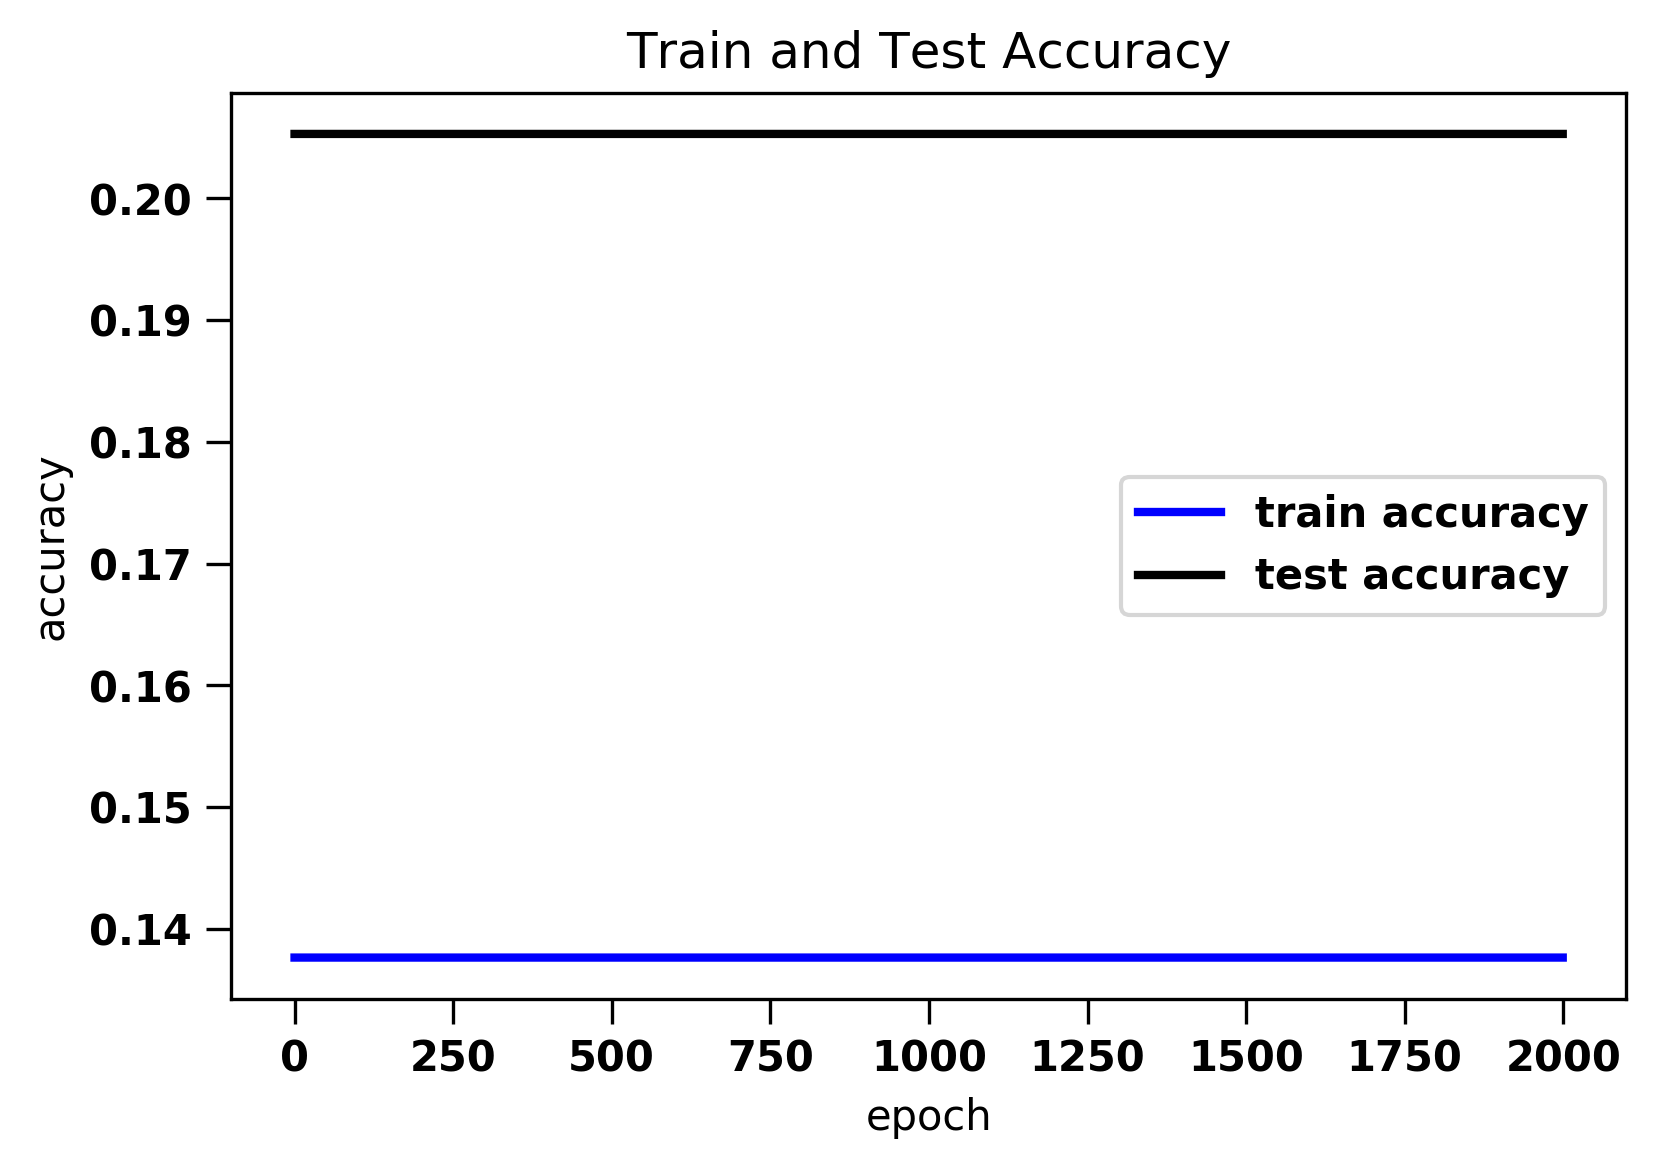

In [332]:
# accuracy
plt.plot(train_acc, 'b-', label='train accuracy')
plt.plot(test_acc, 'k-', label='test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Train and Test Accuracy')
plt.legend(loc='best')
plt.show()

In [ ]:
print(data)

In [ ]:
#https://stackoverflow.com/questions/43426454/tensorflow-simple-logistic-regression

In [61]:
learning_rate = 0.05
total_iterator = 1500
display_per = 100


m = X.shape[0]
print(m)

x_i = tf.placeholder(tf.float32,[None,4]) # None x 2                        
y_i = tf.placeholder(tf.float32,[None,1]) # None x 1                       

W = tf.Variable(tf.zeros([4,1]))  # 2 x 1 
b = tf.Variable(tf.zeros([1]))  # 1 x 1 

h = tf.matmul(x_i,W)+b
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_i, logits=h))

754


In [63]:
initializer= tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    #print("cost: ", sess.run(cost, feed_dict={x_i:train_X, 
    #y_i:train_Y}), "w: ", sess.run(W),"b: ", sess.run(b))
    print("cost: ", sess.run(cost, feed_dict={x_i:X,y_i:Y}))
    
    #, "w: ", sess.run(W),"b: ", sess.run(b))
    
    

ValueError: Cannot feed value of shape (754,) for Tensor u'Placeholder_5:0', which has shape '(?, 1)'

In [52]:
#w = np.where( (np.array(PDict.values())[:,1] > 0) & (np.array(PDict.values())[:,2] > 0))

#sX = np.asarray(PDict.values())[w,1][0]
#sY = np.asarray(PDict.values())[w,2][0]

sX = np.linspace(0.,100.,40.)
sY = np.linspace(0.,50.,40.)

X  =  tf . placeholder ( tf.float32 ,  name = "X")
Y  =  tf . placeholder ( tf.float32 ,  name = "Y")

In [53]:
w  =  tf.Variable (0.0 ,name = "weights") 
b  =  tf.Variable (tf.zeros,name = "bias")

In [54]:
Y_predicted  =  X  *  w  +  b

In [55]:
loss = tf.square(Y  -  Y_predicted, name = "loss")

In [56]:
optimizer  =  tf.train.GradientDescentOptimizer ( learning_rate = 0.0001 ).minimize(loss)

In [58]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())



# Step 7: initialize the necessary variables, in this case, w and b 
    # Step 8: train the model
for  i  in  range (1000):   # run 100 epochs 
        #for  x ,  y  in  data:
            # Session runs train_op to minimize loss
    sess.run(optimizer, feed_dict ={X:sX, Y:sY})
    
    # Step 9: output the values of w and b
w_value ,  b_value  =  sess.run ([ w ,  b ])
print(w_value,b_value)

(nan, nan)


In [ ]:
plt.scatter(sX,sY)

xbins =np.linspace(np.min(sX),np.max(sX),100)
plt.plot(xbins,xbins*w_value+ b_value)

In [40]:
import tensorflow as tf

# to begin with, load your data
# you have to implement your own load_data function


X = np.array(np.array(PDict.values())[:,2:6])
Y = np.array(np.array(PDict.values())[:,0:2])

print(X[0])

# set replace=False, Avoid double sampling
train_index = np.random.choice(len(X), int(round(len(X) * 0.8)), replace=False)
# diff set
test_index = np.array(list(set(range(len(X))) - set(train_index)))
train_X = X[train_index]
train_Y = Y[train_index]
test_X = X[test_index]
test_Y = Y[test_index]


# data format is as usual:
# train_X and test_X have shape (num_instances, num_features)
# train_Y and test_Y have shape (num_instances, num_classes)
num_features = train_X.shape[1]
num_classes = train_Y.shape[1]

# Create variables
# X is a symbolic variable which will contain input data
# shape [None, num_features] suggests that we don't limit the number of instances in the model
# while the number of features is known in advance
X = tf.placeholder("float", [None, num_features])
# same with labels: number of classes is known, while number of instances is left undefined
Y = tf.placeholder("float",[None, num_classes])


[ 0. 44. 13.  5.]


In [42]:

# W - weights array
W = tf.Variable(tf.zeros([num_features,num_classes]))
# B - bias array
B = tf.Variable(tf.zeros([num_classes]))

# Define a model
# a simple linear model y=wx+b wrapped into softmax
pY = tf.nn.softmax(tf.matmul(X, W) + B)
# pY will contain predictions the model makes, while Y contains real data

# Define a cost function
#cost_fn = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pY, Y))
# You could also put it in a more explicit way
cost_fn = -tf.reduce_sum(Y * tf.log(pY))


In [46]:

# Define an optimizer
# I prefer Adam
opt = tf.train.AdamOptimizer(0.01).minimize(cost_fn)
# but there is also a plain old SGD if you'd like
#opt = tf.train.GradientDescentOptimizer(0.01).minimize(cost_fn)

# Create and initialize a session
sess = tf.Session()
sess.run(init)

sess.run(tf.global_variables_initializer())

num_epochs = 40
for i in range(num_epochs):
  # run an optimization step with all train data
  sess.run(opt, feed_dict={X:train_X, Y:train_Y})
  # thus, a symbolic variable X gets data from train_X, while Y gets data from train_Y

# Now assess the model
# create a variable which reflects how good your predictions are
# here we just compare if the predicted label and the real label are the same
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(pY,1), tf.argmax(Y,1)), "float"))
# and finally, run calculations with all test data
accuracy_value = sess.run(accuracy, feed_dict={X:test_X, Y:test_Y})

In [44]:
print(accuracy,accuracy_value)

(<tf.Tensor 'Mean:0' shape=() dtype=float32>, 1.0)


In [47]:
print(W,B)

(<tf.Variable 'Variable_2:0' shape=(4, 2) dtype=float32_ref>, <tf.Variable 'Variable_3:0' shape=(2,) dtype=float32_ref>)


In [49]:
print(tf.matmul(X[0], W) + B)

ValueError: Shape must be rank 2 but is rank 1 for 'MatMul_3' (op: 'MatMul') with input shapes: [4], [4,2].